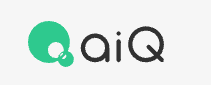

[disclaimer](./disclaimer.txt/)

# How to load FACTSET company fundamental data
- look up the unique FACTSET XXXX IDs (=FSYM_ID) from factor
- load fundamental data for the companies specified by FSYM_ID

## `DAL`  Data Accessor Library 
> DAL access data from FACTSET database / API for Equity Data  ## Import ASR Data Accessor Library (DAL)

In [23]:
from aiq_strategy_robot.data.data_accessor import DAL
data_source='FACTSET'
handler = DAL()

### Step 1: look up FACTSET unique company ID (FSYM_ID) from a ticker.
> This can be done with company names and figis as well. Please refer to the sample notebook for Lookup Symbol functionality.

####  **load**
> Load the data to memory  
> Set data_type = 'quants_factor_list' for looking up instrument IDs.

In [24]:
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_list',
    # factors="retMom63D",
    factor_groups="Momentum",
    # keyword="momentum",
)
df_symbol = handler.retrieve()
df_symbol.head(20)

,factor,name,factorGroup,sdfName,formula,tags,format
0,velocity63D,63D Velocity,Momentum,VELOCITY_63D,"QFL_VELOCITY(0,63D)","momentum,prices",double
1,stochastic63D,63D Stochastic Oscillator,Momentum,STOCHASTIC_63D,"QFL_STOCHASTIC(0,63D)","momentum,prices",double
2,retMom63D,63D Return Momentum,Momentum,RET_MOM_63D,"QFL_RET_MOM(0,63D)","momentum,prices",double
3,resRetMom63D,63D Residual Momentum,Momentum,RES_RET_MOM_63D,"QFL_RES_RET_MOM(0,63D)","momentum,prices",double
4,rsi63D,63D Relative Strength Index,Momentum,RSI_63D,"QFL_RSI(0,63D)","momentum,prices",double
5,accel63D,63D Acceleration,Momentum,ACCEL_63D,"QFL_ACCEL(0,63D)","momentum,prices",double
6,velocity60M,60M Velocity,Momentum,VELOCITY_60M,"QFL_VELOCITY(0,60M)","momentum,prices",double
7,stochastic60M,60M Stochastic Oscillator,Momentum,STOCHASTIC_60M,"QFL_STOCHASTIC(0,60M)","momentum,prices",double
8,retMom60M,60M Return Momentum,Momentum,RET_MOM_60M,"QFL_RET_MOM(0,60M)","momentum,prices",double
9,resRetMom60M,60M Residual Momentum,Momentum,RES_RET_MOM_60M,"QFL_RES_RET_MOM(0,60M)","momentum,prices",double


### Pattern 2: Look up FSYM_ID from factors


In [25]:
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_list',
    factors="retMom63D",
    # factor_groups="Momentum",
    keyword="momentum",
)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,factor,name,factorGroup,sdfName,formula,tags,format
0,retMom63D,63D Return Momentum,Momentum,RET_MOM_63D,"QFL_RET_MOM(0,63D)","momentum,prices",double


#### Caution: You can only input either factors or factset_groups, not both, when searching.

In [26]:
# An error is thrown if you input both factors and factor_groups as follows.
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_list',
    factors="retMom63D",
    factor_groups="Momentum",
    keyword="momentum",
)

AssertionError: `factor` and `factor_group` cannot be set together. Use either one.

### Step 2: Use the FSYM_ID above to load fundamental data by `data_type` = 'quants_factor_data'
> these are initial publications

### Pattern 1: look up FACTSET from list factors and symbols.

####  **load**
> Load the data to memory  
> Set data_type = 'quants_factor_data' for looking up instrument IDs.

In [29]:
# `data_type` must be 'quants_factor_data'

handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_data',
    list_symbols="MH33D6-R",
    list_factors="retMom63D",
    # list_tickers="AAPL-US",
    # freq="CY",
    start_datetime="2023-01-01",
    end_datetime="2023-02-01",
    freq='D'
    # num_chunks=10,
)
handler.retrieve(transformed=False)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### Pattern 2: Look up FSYM_ID from list factors and tickers
> If you know tickers, then it is quicker as in the next example.

In [6]:
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_data',
    # list_symbols="AAPL-US",
    list_factors="ebitMgnFwdChg3Yr",
    list_tickers="AAPL-US",
    # freq="CY",
    start_datetime="2023-01-01",
    end_datetime="2023-02-01",
    # num_chunks=10,
)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,,ebitMgnFwdChg3Yr
symbol,datetime,
MH33D6-R,2023-01-31,-1.376834


### Pattern 3: Look up FSYM_ID to be added to freq parameter.
>Frequency can be selected from "d", "w", "m", "am", "cq", "ay" and "cy".

In [7]:
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_data',
    list_symbols="AAPL-US",
    list_factors="ebitMgnFwdChg3Yr",
    list_tickers="AAPL-US",
    freq="CY",  # ["D", "W", "M", "AM", "CQ", "AY", "CY"]
    start_datetime="2023-01-01",
    end_datetime="2023-02-01",
    # num_chunks=10,
)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,,ebitMgnFwdChg3Yr
symbol,datetime,
MH33D6-R,2022-12-30,-1.432398


### Pattern 4: Look up FSYM_ID to be added to num_chunk parameter.


num_chunk(chunksize) is a parameter used to split large data into smaller parts to be read in.

In [8]:
# The input argument for FSYM_ID is `factset_id`.
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_data',
    list_symbols="AAPL-US",
    list_factors="ebitMgnFwdChg3Yr",
    # list_tickers="AAPL-US",
    # freq="CY",  # kore
    start_datetime="2023-01-01",
    end_datetime="2023-02-01",
    num_chunks=100,

)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,,ebitMgnFwdChg3Yr
symbol,datetime,
MH33D6-R,2023-01-31,-1.376834


#### Caution: You must provide 'list_factors' and can not do provide both 'list_tickers' and 'list_symbols' at the same time

Either 'list_tickers' or 'list_symbols' must be provided, so both parameter can not be empty.

In [9]:
# An error is thrown if you input without both 'list_tickers' and 'list_symbols'.
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_data',
    # list_symbols="AAPL-US",
    list_factors="ebitMgnFwdChg3Yr",
    # list_tickers="AAPL-US",
    freq="CY",
    start_datetime="2023-01-01",
    end_datetime="2023-02-01",
    num_chunks=10,
)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

ValueError: Either 'list_tickers' or 'list_symbols' must be provided, but both are empty.